# Lithops Pi number Montecarlo approximation example
In this notebook we will calculate an approximation to the number Pi by applying the Montecarlo algorithm with Lithops. Functions will process a fixed amount of random samples each that will then be averaged to provide the approximation.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from lithops.multiprocessing import Pool, Queue

%matplotlib notebook

In [22]:
N = 1000
iter_per_func = 100000
chosen_func_mod = N // 20
num_points_to_send = 200

### Monitoring
Some functions will be chosen to send some of their already classified points over a queue that the main process will be consuming from to provide a live image of the first results.

In [28]:
def pi_montecarlo(n, q):  
    l = list()
    value = 0
    chosen = n % chosen_func_mod == 0
    
    for i in range(iter_per_func):
        # Generate random point between 0 and 1
        x = np.random.rand() 
        y = np.random.rand()
        z = np.sqrt(x * x + y * y)
        if z <= 1:
            # Point is inside circle
            value += 1

        if chosen:
            l.append((x, y, z))
            if i == num_points_to_send:
                # Send generated points
                q.put(l)
                chosen = False
            
    est_pi = value * 4.0 / iter_per_func
    return est_pi

### Execution

In [33]:
config = {'lithops': {'backend': 'ibm_cf', 'storage': 'ibm_cos'},
          'ibm': {'iam_api_key': 'Ha939h_eaXp5j27K15BEz9U0t0O8zAV9Ba5UgsUgcJxY'},
          'ibm_cf':  {'endpoint': 'https://eu-de.functions.cloud.ibm.com',
                      'namespace': 'Namespace-CF-deneme',
                      'namespace_id': '81c36d73-dc14-4ab4-a9a7-17aa79c1a17a'},
          'ibm_cos': {'storage_bucket': 'bv-first-bucket',
                      'region': 'eu-de',
                      'api_key': 'P3-7eRMHMVSFmLpQIF5KcVRpVlkvfW5ye4TSFkpP4w73'}}
pool = Pool(initargs = config)
queue = Queue()
results = pool.starmap_async(func=pi_montecarlo, iterable=[(i, queue) for i in range(N)])

2021-09-15 16:45:57,891 [INFO] lithops.config -- Lithops v2.4.1
2021-09-15 16:45:57,894 [INFO] lithops.storage.backends.localhost.localhost -- Localhost Storage client created
2021-09-15 16:45:57,896 [INFO] lithops.localhost.localhost -- Localhost compute client created


Exception: Redis section not found in you config

Exception ignored in: <function _ConnectionBase.__del__ at 0x00000185E9995E50>
Traceback (most recent call last):
  File "C:\Users\berke\anaconda3\envs\ibm-cos\lib\site-packages\lithops\multiprocessing\connection.py", line 117, in __del__
    self._close()
  File "C:\Users\berke\anaconda3\envs\ibm-cos\lib\site-packages\lithops\multiprocessing\connection.py", line 311, in _close
    if self._pubsub is not None:
AttributeError: '_RedisConnection' object has no attribute '_pubsub'
Exception ignored in: <function _ConnectionBase.__del__ at 0x00000185E9995E50>
Traceback (most recent call last):
  File "C:\Users\berke\anaconda3\envs\ibm-cos\lib\site-packages\lithops\multiprocessing\connection.py", line 117, in __del__
    self._close()
  File "C:\Users\berke\anaconda3\envs\ibm-cos\lib\site-packages\lithops\multiprocessing\connection.py", line 311, in _close
    if self._pubsub is not None:
AttributeError: '_RedisConnection' object has no attribute '_pubsub'
Exception ignored in: <function _C

### Plot results on the go

<IPython.core.display.Javascript object>


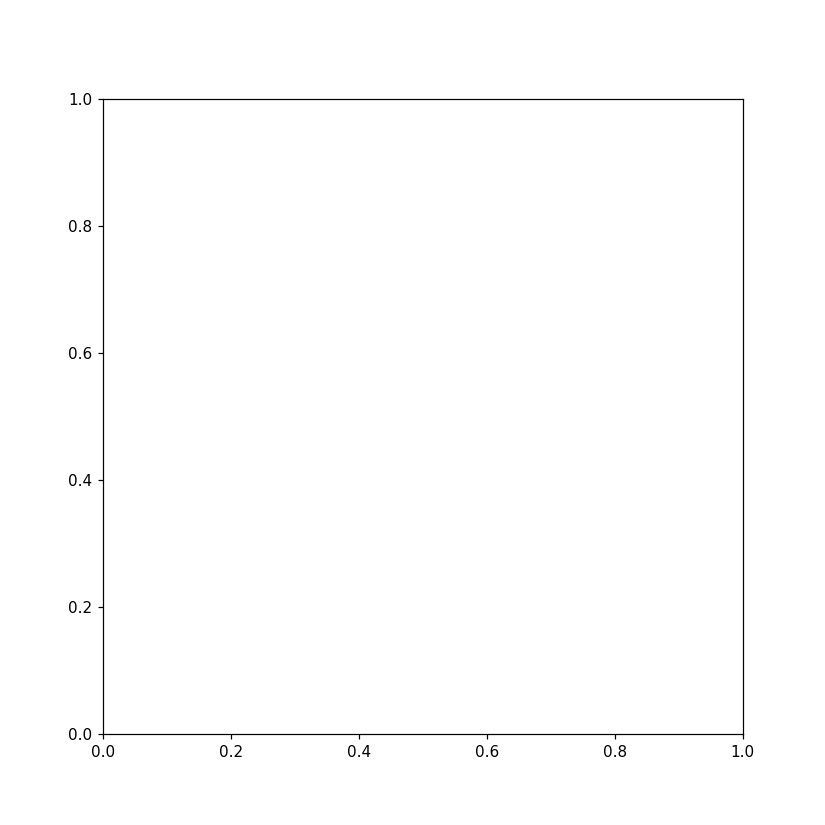

NameError: name 'queue' is not defined

In [14]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
plt.ion()
fig.canvas.draw()
plt.show()

n_messages = 0
num_chosen_func = N // chosen_func_mod

while n_messages < num_chosen_func:
    l = queue.get()  
    for x, y, z in l:
        color = 'red' if z <= 1 else 'blue'
        ax.scatter(x, y, c=color, s=2)
    n_messages += 1
    plt.title("Displaying {:,d} of {:,d} generated points".format(n_messages*num_points_to_send, N*iter_per_func))
    fig.canvas.draw()

plt.close()

## Pi estimation
Finally, we try to calculate the number Pi by averaging the results of each function.  
The more iterations we perform, the more acurate the approximation becomes.

In [15]:
est_pi = np.mean(results.get())
print('Estimated pi: {}'.format(est_pi))
print('Num iterations: {:,d}'.format(N*iter_per_func))

NameError: name 'results' is not defined